## MANIPULATION ET PRETRAITEMENT DE DONNEES ##

### I. PRESENTATION DES DONNEES ###

##### 1. Import des bibliothèques et du jeu de données #####

In [143]:
# Import des bibliothèques :
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
# Import du jeu de données au format csv :
phd = pd.read_csv('dataset.csv', sep = ',', encoding='utf-8', engine='python')

##### 2. Informations sur les données #####

_a. Nombre de lignes_

In [145]:
# Affichage du nombre de lignes du tableau :
rows, cols = phd.shape
print(f"Dans le jeu de données, il y a {rows} lignes et {cols} colonnes")

Dans le jeu de données, il y a 448047 lignes et 23 colonnes


 _b. Premières lignes du tableau_ 

In [146]:
# Affichage des premières lignes du tableau :
phd.head(3)

,Unnamed: 0,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
0,0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN
2,2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,Medecine,male,Université de Lorraine,Français


_c. Summary des variables_

In [147]:
# Création du summary des variables :
phd.columns

Index(['Unnamed: 0', 'Auteur', 'Identifiant auteur', 'Titre',
       'Directeur de these', 'Directeur de these (nom prenom)',
       'Identifiant directeur', 'Etablissement de soutenance',
       'Identifiant etablissement', 'Discipline', 'Statut',
       'Date de premiere inscription en doctorat', 'Date de soutenance',
       'Year', 'Langue de la these', 'Identifiant de la these',
       'Accessible en ligne', 'Publication dans theses.fr',
       'Mise a jour dans theses.fr', 'Discipline_prÃ©di', 'Genre',
       'etablissement_rec', 'Langue_rec'],
      dtype='object')

_d. Nature des variables_ 

In [148]:
# Identification de la nature des différentes variables
print(phd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [149]:
# Présentation d'un résumé statistique es différentes variables :
phd.describe(include = 'object')

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Date de soutenance,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
count,448047,317700,448040,448034,448034,448047,448046,430965,448047,448047,...,390961,448047,448047,448047,448047,447870,448047,448047,444973,383927
unique,430273,313771,446816,159019,159021,98906,567,572,24262,2,...,3991,206,447567,2,2765,2633,15,6,110,4
top,Nicolas Martin,",",#NAME?,Directeur de these inconnu,Directeur de these inconnu,na,Paris 6,27787087,Medecine,soutenue,...,01-01-94,fr,s177556,non,24-05-13,07-07-20,Biologie,male,Sorbonne Université,Français
freq,16,462,17,713,713,49488,21201,20926,25914,381360,...,12991,334443,8,347699,205882,61846,100207,207639,33498,334443


### II. DONNEES MANQUANTES ###

##### 1. Matrice de nullité ####

In [150]:
# Paramétrage du style de police des graphiques : 
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

In [151]:
# Calcul du taux de nullité moyen par colonne :
taux_nullité = (phd.isnull().mean() * 100).round(1)

In [152]:
# Classement des taux de nullité moyens par ordre décroissant :
taux_nullité_décroissant = taux_nullité.sort_values(ascending = False)

In [153]:
# Classement des colonnes par taux de nullité moyen décroissant :
print(taux_nullité_décroissant)

Date de premiere inscription en doctorat    85.6
Identifiant auteur                          29.1
Langue_rec                                  14.3
Year                                        12.7
Date de soutenance                          12.7
Identifiant etablissement                    3.8
etablissement_rec                            0.7
Langue de la these                           0.0
Genre                                        0.0
Discipline_prÃ©di                            0.0
Mise a jour dans theses.fr                   0.0
Publication dans theses.fr                   0.0
Accessible en ligne                          0.0
Identifiant de la these                      0.0
Titre                                        0.0
Directeur de these                           0.0
Auteur                                       0.0
Statut                                       0.0
Discipline                                   0.0
Etablissement de soutenance                  0.0
Identifiant directeu

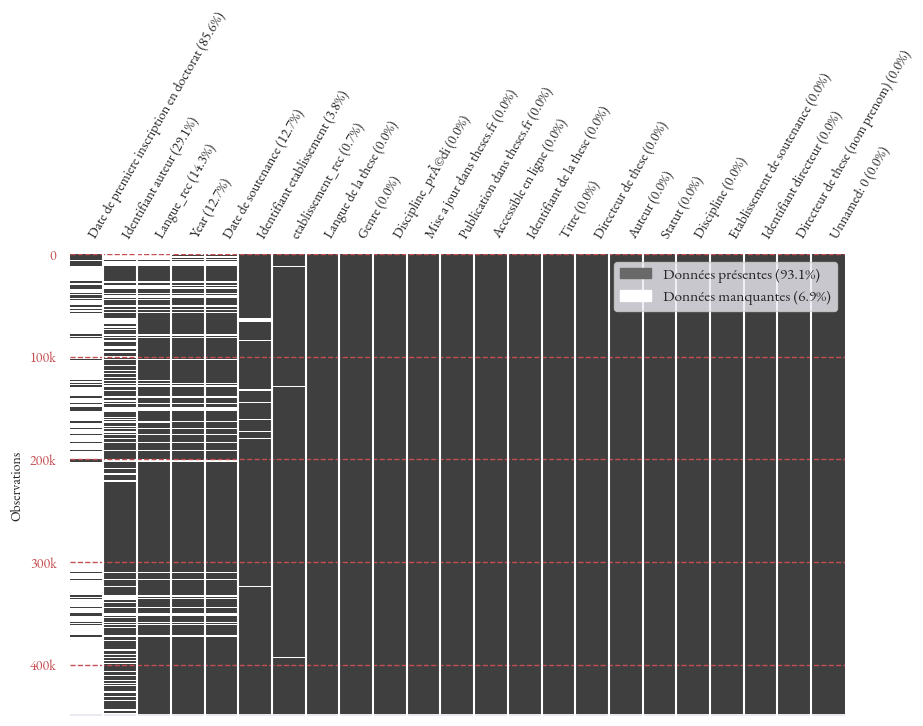

In [154]:
# Réorganisation des colonnes du tableau par taux de nullité moyen décroissant :
phd = phd[taux_nullité_décroissant.index]

# Création de la figure :
fig, ax = plt.subplots(figsize=(10, 6))

# Création de la matrice de nullité : 
msno.matrix(phd, ax = ax, sparkline = False)

# création de la liste des étiquettes avec les taux de nullité moyens :
labels = [f"{col} ({rate:.1f}%)" for col, rate in zip(taux_nullité_décroissant.index, taux_nullité_décroissant)]

# Affichage des étiquettes de l'axe des abscisses :
plt.gca().set_xticklabels(labels, rotation=60, fontsize = 10)

# Définition des positions des graduations sur l'axe des ordonnées :
positions_grad = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]
plt.gca().set_yticks(positions_grad)

# Affichage des étiquettes de l'axe des ordonnées :
etiquettes_grad = ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k']
plt.gca().set_yticklabels(etiquettes_grad, 
                          rotation=0, 
                          fontsize = 10)

# Ajout de l'étiquette de l'axe des y : 
plt.ylabel("Observations", fontsize = 10)

# Ajout des graduations sur l'axe des y :
plt.yticks([0, 100000, 200000, 300000, 400000], color = 'r')

# Calcul des pourcentages de données manquantes et non manquantes :
total_cellules = phd.shape[0] * phd.shape[1]
cellules_manquantes = phd.isnull().sum().sum()
pourcentage_manquant = (cellules_manquantes / total_cellules) * 100
pourcentage_non_manquant = 100 - pourcentage_manquant

# Affichage de la grille :
plt.grid(which='major', 
         axis = 'y', 
         color = 'r', 
         linestyle = '--')

# Définition des annotations pour la légende :
gray_patch = mpatches.Patch(color = 'dimgray', 
                            label = f"Données présentes ({pourcentage_non_manquant:.1f}%)")
white_patch = mpatches.Patch(color = 'white',
                             label = f"Données manquantes ({pourcentage_manquant:.1f}%)")
plt.legend(handles = [gray_patch, white_patch])

# Affichage du graphique :
plt.show()

#### 2. Heatmap ####

In [155]:
# Affichage des premières lignes du tableau :
phd['Statut'].head(3)

0     enCours
1     enCours
2    soutenue
Name: Statut, dtype: object

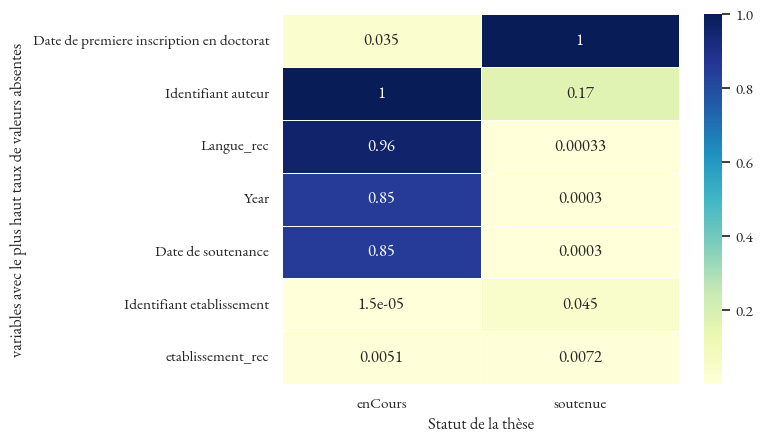

In [274]:
# Définition des étiquettes des axes :
etiquettes_x = phd['Statut'].unique()
etiquettes_y = taux_nullité_décroissant.index[:7]

# Création de la matrice :
matrice_taux_nullite = pd.DataFrame(0.0, 
                                    index = etiquettes_y, 
                                    columns = etiquettes_x)

# Ajout des taux de nullité pour chaque combinaison de statut et colonne :
for col in etiquettes_y:
    for statut in etiquettes_x:
        # Filtre du DataFrame pour le statut actuel :
        df_filtre = phd[phd['Statut'] == statut]
        # Calcul du taux de valeurs nulles pour la colonne actuelle dans le statut filtré :
        taux_null = df_filtre[col].isnull().mean()
        # Conversion de taux_null en float si nécessaire :
        taux_null = float(taux_null)
        # Assignation du taux de valeurs nulles à la matrice :
        matrice_taux_nullite.loc[col, statut] = float(taux_null)

# Création de la heatmap avec Seaborn :
sns.heatmap(matrice_taux_nullite, 
            annot = True,
            linewidths =.5,
            cmap = "YlGnBu")

# Obtention de l'axe actuel :
ax = plt.gca()

# Ajout des titres des axes :
ax.set_xlabel('Statut de la thèse',
              fontsize = 12)
ax.set_ylabel("variables avec le plus haut taux de valeurs absentes",
              fontsize = 12)

# Affichage de la heatmap :
plt.show()

#### 3. Matrice de nullité filtrée ####

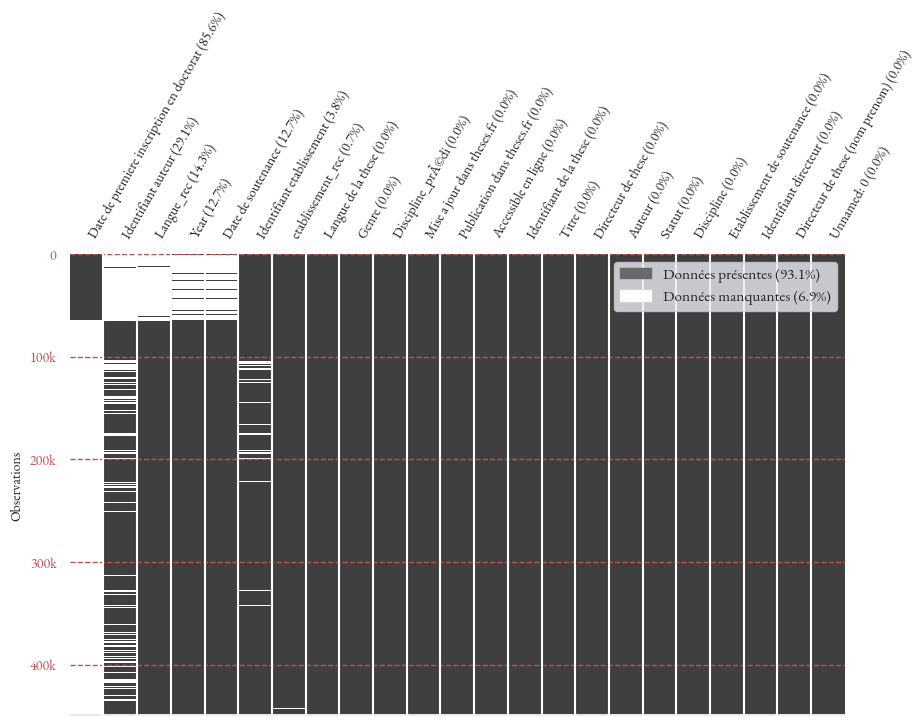

In [157]:
# Tri des colonnes par taux de nullité moyen décroissant :
phd = phd[taux_nullité_décroissant.index]

# Création de la figure :
fig, ax = plt.subplots(figsize=(10, 6))

# Tri des données par la première colonne ('Date de premiere inscription en doctorat') :
phd_triés = phd.sort_values('Date de premiere inscription en doctorat')

# Création de la matrice de nullité avec les données triées :
msno.matrix(phd_triés, ax = ax, sparkline = False)

# Création des étiquettes pour l'axe des abscisses :
labels = [f"{col} ({rate:.1f}%)" for col, rate in zip(taux_nullité_décroissant.index, taux_nullité_décroissant)]

# Rotation et taille des étiquettes de l'axe des abscisses :
plt.gca().set_xticklabels(labels, rotation = 60, fontsize = 10)

# Définition des positions des graduations sur l'axe des ordonnées :
positions_grad = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]
plt.gca().set_yticks(positions_grad)

# Étiquettes des graduations sur l'axe des ordonnées :
etiquettes_grad = ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k']
plt.gca().set_yticklabels(etiquettes_grad, rotation = 0, fontsize = 10)

# Ajout du label de l'axe des ordonnées :
plt.ylabel("Observations", fontsize = 10)

# Personnalisation des graduations sur l'axe des y :
plt.yticks([0, 100000, 200000, 300000, 400000], color = 'r')

# Calcul des pourcentages de données manquantes et non manquantes :
total_cells = phd.shape[0] * phd.shape[1]
missing_cells = phd.isnull().sum().sum()
percent_missing = (missing_cells / total_cells) * 100
percent_non_missing = 100 - percent_missing

# Affichage de la grille :
plt.grid(which = 'major',
         axis = 'y', 
         color = 'r',
         linestyle = '--')

# Définition des annotations pour la légende :
gray_patch = mpatches.Patch(color='dimgray', label=f"Données présentes ({percent_non_missing:.1f}%)")
white_patch = mpatches.Patch(color='white', label=f"Données manquantes ({percent_missing:.1f}%)")
plt.legend(handles=[gray_patch, white_patch])

# Affichage du graphique :
plt.show()

#### 4. Dendrogramme des données manquantes ####

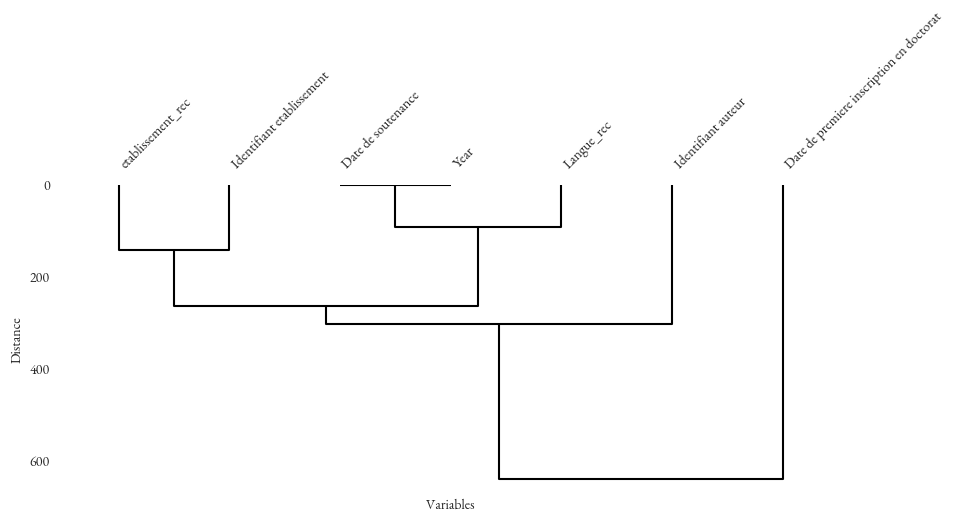

In [277]:
# Création du tableau filtré : 
Liste_correlations = phd[['Date de premiere inscription en doctorat',
                          'Identifiant auteur',
                          'Langue_rec',
                          'Year',
                          'Date de soutenance',
                          'Identifiant etablissement',
                          'etablissement_rec']]

# Création du dendrogramme :
msno.dendrogram(Liste_correlations)

# Personnalisation du dendrogramme :
plt.xlabel('Variables', fontsize = 10) 
plt.ylabel('Distance', fontsize = 10)  
plt.xticks(rotation = 45, fontsize = 10)  
plt.yticks(fontsize = 10)

# Changement de la taille de la figure :
plt.gcf().set_size_inches(10, 4)

# Affichage du graphique :
plt.show()

### III. PRINCIPAUX PROBLEMES DETECTES ###

##### 1. Nombre de soutenances par mois #####

_a. Ajout de colonnes au tableau_

In [279]:
# Conversion des données de la colonne "Date de soutenance" au format date :
phd['Date de soutenance'] = pd.to_datetime(phd['Date de soutenance'], errors = 'coerce')

# Ajout d'une colonne "jour de soutenance" au tableau phd :
phd['Jour de soutenance'] = phd['Date de soutenance'].dt.day.fillna(0).astype(int)

# Ajout d'une colonne "mois de soutenance" au tableau phd :
phd['Mois de soutenance'] = phd['Date de soutenance'].dt.month.fillna(0).astype(int)

# Ajout d'une colonne "année de soutenance" au tableau phd :
phd['Année de soutenance'] = phd['Date de soutenance'].dt.year.fillna(0).astype(int)

# Création du dictionnaire des mois de l'année :
mois_dict = {                  
    1 : 'janvier', 
    2 : 'février', 
    3 : 'mars', 
    4 : 'avril',
    5 : 'mai', 
    6 : 'juin', 
    7 : 'juillet', 
    8 : 'août',
    9 : 'septembre', 
    10 : 'octobre', 
    11 : 'novembre', 
    12 : 'décembre'}

# Définition de l'ordre des mois :
mois_ordonnés = ['janvier', 
                 'février', 
                 'mars', 
                 'avril', 
                 'mai', 
                 'juin', 
                 'juillet', 
                 'août', 
                 'septembre', 
                 'octobre', 
                 'novembre', 
                 'décembre']

# Définition de l'ordre des années :
années_ordonnées = list(map(str, range(2005, 2019)))

# Remplacement des valeurs numériques représentant les mois de l'année par des noms
phd['Mois de soutenance'] = phd['Mois de soutenance'].map(mois_dict).fillna('inconnu')

# Conversion des séries en DataFrames :
phd_jour_soutenance = phd[['Jour de soutenance']]
phd_mois_soutenance = phd[['Mois de soutenance']]
phd_année_soutenance = phd[['Année de soutenance']]

# Affichage du tableau phd avec les trois colonnes en plus :
print(phd.iloc[ : 3, -3 : ])

   Jour de soutenance Mois de soutenance  Année de soutenance
0                   0            inconnu                    0
1                   0            inconnu                    0
2                   1            janvier                 1993


_b. Définition de la période_

In [219]:
# Définition de la période pour filtrer les données :
date_début = '1984-01-01'
date_fin = '2018-12-31'

# Création d'un nouveau dataframe filtré sur la période précisée :
Filtre = (phd['Date de soutenance'] >= date_début) & (phd['Date de soutenance'] <= date_fin)
phd_1984_2018 = phd.loc[Filtre]

# Affichage des deux dernières colonnes du tableau :
print(phd_1984_2018.iloc[ : 3, -2 : ])

  Mois de soutenance  Année de soutenance
2            janvier                 1993
5           novembre                 2008
6            janvier                 2005


_c. distribution du mois de soutenance, entre 1984 et 2018_

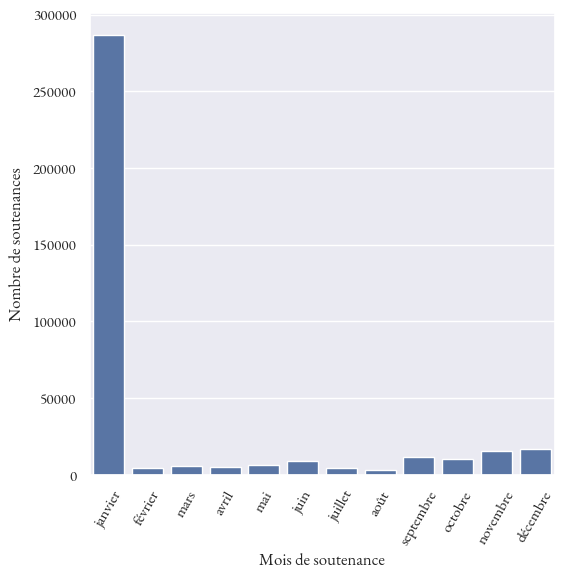

In [220]:
# Configuration du style :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Configuration de la taille de la figure :
plt.figure(figsize = (6, 6))

# Création du graphique de distribution :
sns.countplot(data = phd_1984_2018,
              x = 'Mois de soutenance',
              order = mois_ordonnés)

# Personnalisation des étiquettes du tracé :
plt.xticks(rotation = 60)

# Ajout des titres aux axes :
plt.xlabel('Mois de soutenance') 
plt.ylabel('Nombre de soutenances')  

# Affichage du tracé :
plt.show()


##### 2. Nombre de soutenances par mois en fonction des années #####

_a. Création du filtre temporel_

In [162]:
# Définition de la période pour filtrer les données :
date_début_revu = '2005-01-01'
date_fin_revu = '2018-12-31'

# Création d'un nouveau dataframe filtré sur la période précisée :
Filtre_revu = (phd_1984_2018['Date de soutenance'] >= date_début_revu) & (phd_1984_2018['Date de soutenance'] <= date_fin_revu)
phd_2005_2018 = phd_1984_2018.loc[Filtre_revu]

# Affichage du tableau :
print(phd_2005_2018.iloc[ : 3, -2 : ])

plt.show()

  Mois de soutenance  Année de soutenance
5           novembre                 2008
6            janvier                 2005
7               août                 2009


_b. Calcul des proportions de soutenances par mois et par années_

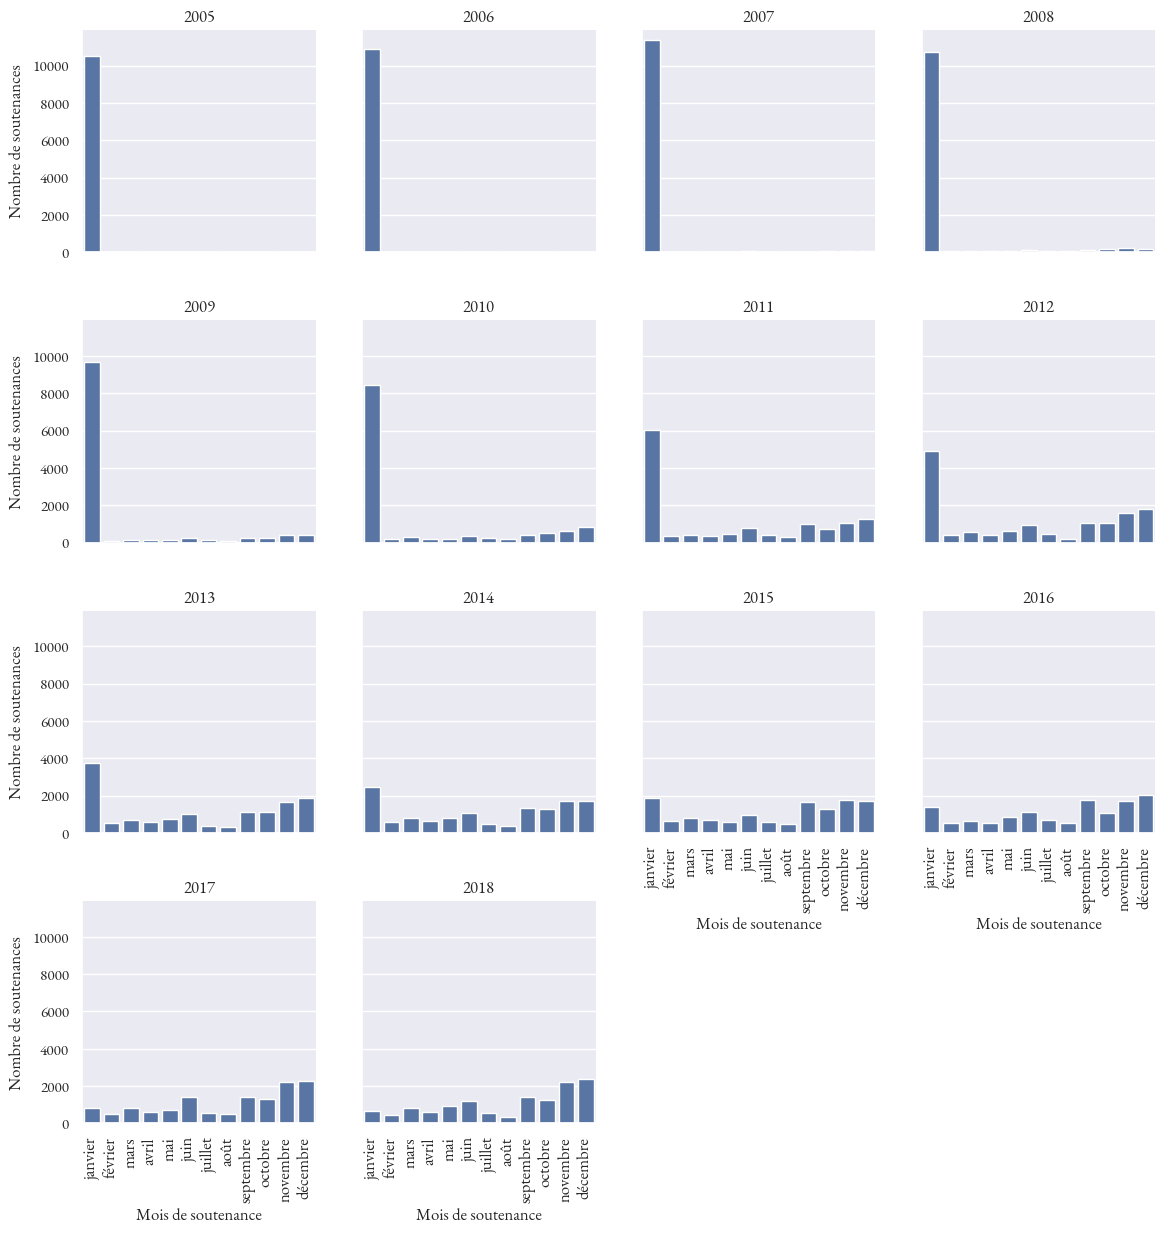

In [281]:
# Configuration du style du graphique :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Création du graphique :
g = sns.FacetGrid(phd_2005_2018, 
                  col = 'Année de soutenance',
                  col_wrap = 4,
                  row_order = années_ordonnées)
    
g.map(sns.countplot,
          'Mois de soutenance',
          order = mois_ordonnés)

# Modification des titres des sous-graphiques :
g.set_titles("{col_name}")

# Ajout de l'étiquette de l'axe des y :
g.set_axis_labels("Mois de soutenance", "Nombre de soutenances")

# Rotation et taille des labels de l'axe x :
for ax in g.axes.flat:
    ax.tick_params(axis = 'x', 
                   labelrotation = 90, 
                   labelsize = 12)

# Affichage du graphique :
plt.show()

##### 3. Proportion de thèses soutenues au fil des mois #####

_a. Extraction des données nécessaires à la création d'une base intermédiaire_

In [164]:
# Calcul du total des soutenances par mois :
soutenances_total = phd['Mois de soutenance'].value_counts()

# Affichage du tableau avec le nombre de soutenances par mois :
soutenances_total

Mois de soutenance
janvier      287704
inconnu       57086
décembre      18293
novembre      17075
septembre     12869
octobre       11197
juin          10411
mai            6948
mars           6878
avril          5547
février        5085
juillet        5046
août           3908
Name: count, dtype: int64

In [282]:
# Calcul de la proportion moyenne de soutenances par mois :
soutenance_prop = phd['Mois de soutenance'].value_counts(normalize = True) * 100

# Arrondi à un chiffre après la virgule :
soutenance_prop_arrondi = soutenance_prop.round(1)

# Affichage du tableau comportant les mois de soutenance et les proportions associées :
print(soutenance_prop_arrondi)

Mois de soutenance
janvier      64.2
inconnu      12.7
décembre      4.1
novembre      3.8
septembre     2.9
octobre       2.5
juin          2.3
mai           1.6
mars          1.5
avril         1.2
février       1.1
juillet       1.1
août          0.9
Name: proportion, dtype: float64


In [284]:
# Affichage de la proportion de soutenances globale :
print('Le total des taux de soutenance mensuels est égal à ', soutenance_prop_arrondi.sum().round(1), "%.")

Le total des taux de soutenance mensuels est égal à  99.9 %.


_b. Création du dataframe intermédiaire_

In [285]:
# Mois de soutenance et leurs proportions :
mois = soutenance_prop_arrondi.index.tolist()
proportions = soutenance_prop_arrondi.tolist()

# Création du DataFrame :
df_soutenances_prop = pd.DataFrame({
     'Mois': mois,
     'Proportion (%)': proportions
})

# Affichage du DataFrame :
df_soutenances_prop

,Mois,Proportion (%)
0,janvier,64.2
1,inconnu,12.7
2,décembre,4.1
3,novembre,3.8
4,septembre,2.9
5,octobre,2.5
6,juin,2.3
7,mai,1.6
8,mars,1.5
9,avril,1.2


_c. Création du graphique_

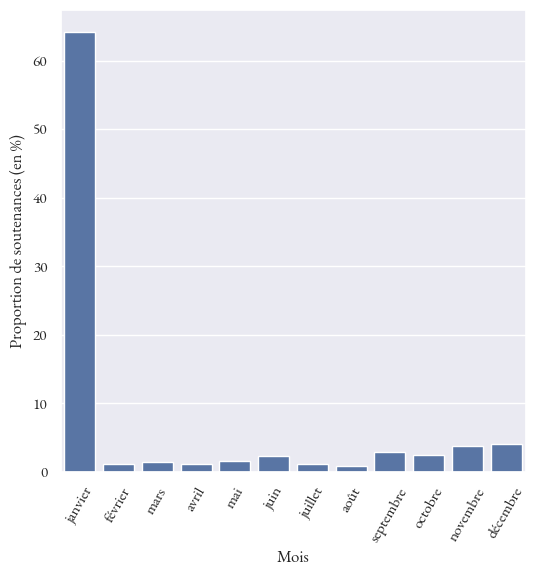

In [296]:
# Configuration de la police du graphique :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Configuration de la taille de la figure :
plt.figure(figsize = (6, 6))

# Création du graphique :
g = sns.barplot(
    data = df_soutenances_prop,
    x = 'Mois',
    y = 'Proportion (%)',
    order = mois_ordonnés)

# Ajout de l'étiquette de l'axe des y :
g.set(xlabel="Mois", ylabel="Proportion de soutenances (en %)")

# Ajout d'une rotation des étiquettes de l'axe des x :
plt.xticks(rotation = 60)

# Affichage du graphique :
plt.show()

##### 4. Proportion de thèses soutenues au 1er janvier #####

_a. Définition de la période_

In [223]:
# Définition de la période pour filtrer les données :
jour_soutenance = 1
mois_soutenance = 'janvier'

# Création d'un nouveau dataframe filtré sur la période précisée :
Filtre_date = (phd_1984_2018['Mois de soutenance'] == mois_soutenance) & (phd_1984_2018['Jour de soutenance'] == jour_soutenance)
phd_jan_01 = phd_1984_2018.loc[Filtre_date]

# Affichage du tableau :
phd_jan_01.iloc[ : 10, -3 : ].join(phd_jan_01['Date de soutenance']).head(3)

,Jour de soutenance,Mois de soutenance,Année de soutenance,Date de soutenance
2,1,janvier,1993,1993-01-01
79,1,janvier,2015,2015-01-01
134,1,janvier,2015,2015-01-01


_b. Création du dataframe_

In [224]:
# Création du DataFrame avec le nombre de soutenances par années :
total_soutenances_par_années = pd.DataFrame(phd_1984_2018.groupby("Année de soutenance")["Jour de soutenance"].count().reset_index())
total_soutenances_par_années.head(3)

,Année de soutenance,Jour de soutenance
0,1984,6
1,1985,3007
2,1986,5162


In [225]:
# Création du dataframe avec le nombre de soutenances faites le 1ER janvier :
total_soutenances_01_01_par_années = pd.DataFrame(phd_jan_01.groupby("Année de soutenance")["Jour de soutenance"].count().reset_index())
total_soutenances_01_01_par_années.head(3)

,Année de soutenance,Jour de soutenance
0,1984,6
1,1985,3007
2,1986,5162


In [226]:
# Fusion des deux dataframes : 
phd_total_soutenances_fusion= pd.merge(total_soutenances_par_années, 
                                       total_soutenances_01_01_par_années, 
                                       on="Année de soutenance")

phd_total_soutenances_fusion.head(3)

,Année de soutenance,Jour de soutenance_x,Jour de soutenance_y
0,1984,6,6
1,1985,3007,3007
2,1986,5162,5162


In [227]:
# Changement du nom des deux dernières colonnes du tableau :
phd_total_soutenances_fusion = phd_total_soutenances_fusion.rename(columns={
    'Jour de soutenance_x': 'Total Soutenances',
    'Jour de soutenance_y': 'Total Soutenances 01-01'
})

phd_total_soutenances_fusion.head(3)

,Année de soutenance,Total Soutenances,Total Soutenances 01-01
0,1984,6,6
1,1985,3007,3007
2,1986,5162,5162


In [228]:
# Ajout d'une colonne proportion :
phd_total_soutenances_fusion['Proportion soutenances 01-01'] = phd_total_soutenances_fusion['Total Soutenances 01-01'] * 100 / phd_total_soutenances_fusion["Total Soutenances"]

# Impression du total des soutenances :
phd_total_soutenances_fusion.head(3)

,Année de soutenance,Total Soutenances,Total Soutenances 01-01,Proportion soutenances 01-01
0,1984,6,6,100.0
1,1985,3007,3007,100.0
2,1986,5162,5162,100.0


_c. Création du graphique_

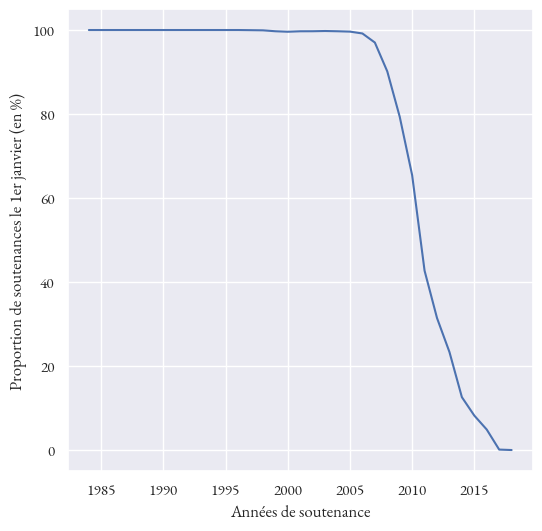

In [229]:
# Configuration du style :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Configuration de la taille de la figure :
plt.figure(figsize=(6, 6))

# Création du tracé linéaire :
sns.lineplot(data = phd_total_soutenances_fusion, 
             x = "Année de soutenance", 
             y = "Proportion soutenances 01-01")

# Ajout des titres aux axes :
plt.xlabel("Années de soutenance")
plt.ylabel("Proportion de soutenances le 1er janvier (en %)")

# Affichage du tracé linéaire :
plt.show()

##### 5. Proportion de thèses soutenues en dehors du 1er janvier, au fil des mois #####

_a. Création du filtre_

In [175]:
# Création du filtre :
jour_soutenance = 1
mois_soutenance = 'janvier'

# Création d'un nouveau dataframe filtré en dehors des dates précisée :
Filtre_hors_01_01 = (phd_1984_2018['Mois de soutenance'].str.lower() != 'janvier') | (phd_1984_2018['Jour de soutenance'] != 1)
phd_hors_01_01 = phd_1984_2018.loc[Filtre_hors_01_01]

# Affichage du tableau :
phd_hors_01_01.iloc[ : 10, -3 : ].join(phd_hors_01_01['Date de soutenance'])

,Jour de soutenance,Mois de soutenance,Année de soutenance,Date de soutenance
5,24,novembre,2008,2008-11-24
6,7,janvier,2005,2005-01-07
7,12,août,2009,2009-08-12
8,1,octobre,2013,2013-10-01
9,24,juin,2011,2011-06-24
10,26,novembre,2010,2010-11-26
14,20,décembre,2007,2007-12-20
15,10,juin,2011,2011-06-10
16,31,août,2012,2012-08-31
22,12,septembre,2010,2010-09-12


_b. Création du dataframe_

In [230]:
# Création du Dataframe avec le nombre de soutenances par mois entre 1984 et 2018, en dehors du 1ER janvier :
total_soutenances_hors_01_01_par_mois = pd.DataFrame(phd_hors_01_01.groupby("Mois de soutenance")["Jour de soutenance"].count().reset_index())
total_soutenances_hors_01_01_par_mois.head(3)

,Mois de soutenance,Jour de soutenance
0,août,3496
1,avril,4880
2,décembre,16611


In [231]:
# Création du Dataframe avec le nombre de soutenances par mois entre 1984 et 2018 :
total_soutenances_par_mois = pd.DataFrame(phd_1984_2018.groupby("Mois de soutenance")["Jour de soutenance"].count().reset_index())
total_soutenances_par_mois.head(3)

,Mois de soutenance,Jour de soutenance
0,août,3496
1,avril,4880
2,décembre,16611


In [232]:
# Création du DataFrame fusionné :
total_soutenances_hors_01_01_fusion = pd.merge(total_soutenances_hors_01_01_par_mois, 
         total_soutenances_par_mois, 
         on = "Mois de soutenance")

total_soutenances_hors_01_01_fusion.head(3)

,Mois de soutenance,Jour de soutenance_x,Jour de soutenance_y
0,août,3496,3496
1,avril,4880,4880
2,décembre,16611,16611


In [233]:
# Changement des noms des deux dernières colonnes du tableau :
total_soutenances_hors_01_01_final = total_soutenances_hors_01_01_fusion.rename(columns={
    'Jour de soutenance_x': 'Total Soutenances hors 01-01',
    'Jour de soutenance_y': 'Total Soutenances'
})

# Affichage du dataframe contenant le total des soutenances par mois en dehors du 1er janvier :
total_soutenances_hors_01_01_final.head(3)

,Mois de soutenance,Total Soutenances hors 01-01,Total Soutenances
0,août,3496,3496
1,avril,4880,4880
2,décembre,16611,16611


In [235]:
# Ajout d'une colonne proportion :
total_soutenances_hors_01_01_final['Proportion soutenances'] = total_soutenances_hors_01_01_final['Total Soutenances hors 01-01'] * 100 / total_soutenances_hors_01_01_final["Total Soutenances hors 01-01"].sum()
total_soutenances_hors_01_01_final['Proportion soutenances']  = total_soutenances_hors_01_01_final['Proportion soutenances'].round(1)

# Impression du total des soutenances :
total_soutenances_hors_01_01_final.head(3)



,Mois de soutenance,Total Soutenances hors 01-01,Total Soutenances,Proportion soutenances
0,août,3496,3496,3.6
1,avril,4880,4880,5.0
2,décembre,16611,16611,16.9


In [236]:
# Impression du total des proportions :
print('le total de la colonne "proportion soutenances" est égal à ', total_soutenances_hors_01_01_final['Proportion soutenances'].sum())

le total de la colonne "proportion soutenances" est égal à  100.1


_c. Création du graphique_

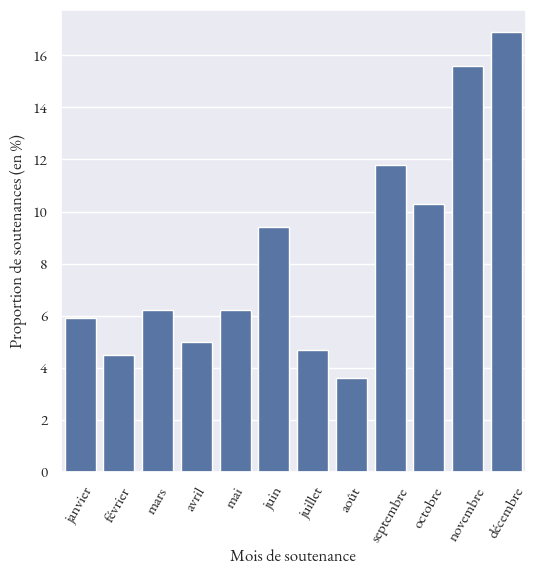

In [237]:
# Configuration du style :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Configuration de la taille de la figure :
plt.figure(figsize = (6, 6))
           
# Création du graphique :
sns.barplot(data = total_soutenances_hors_01_01_final, 
             x = "Mois de soutenance", 
             y = "Proportion soutenances",
             order = mois_ordonnés)

plt.ylabel('Proportion de soutenances (en %)')

# Rotation des étiquettes de l'axe des x :
plt.xticks(rotation = 60)

# Affichage du tracé linéaire :
plt.show()

##### 6. Détection des homonymes ches les noms d'auteurs #####

_a. Création du filtre_

In [182]:
# Création du filtre sur les noms d'auteurs comprenant "Cécile Martin" :
filtre_homonymes = phd_1984_2018[phd_1984_2018['Auteur'] == 'Cecile Martin']
filtre_homonymes.head(3)

,Date de premiere inscription en doctorat,Identifiant auteur,Langue_rec,Year,Date de soutenance,Identifiant etablissement,etablissement_rec,Langue de la these,Genre,Discipline_prÃ©di,...,Auteur,Statut,Discipline,Etablissement de soutenance,Identifiant directeur,Directeur de these (nom prenom),Unnamed: 0,Jour de soutenance,Mois de soutenance,Année de soutenance
61310,NaN,203208145,Français,2017.0,2017-01-16,19077990X,USPC,fr,female,SHS,...,Cecile Martin,soutenue,Etudes cinematographiques et audiovisuelles,Sorbonne Paris Cite,34210393,Jullier Laurent,61310,16,janvier,2017
167180,NaN,81323557,Français,2000.0,2000-01-01,26387859,AgroParisTech,fr,female,Biologie,...,Cecile Martin,soutenue,Sciences biologiques fondamentales et applique...,Institut national agronomique Paris-Grignon,na,LOSSOUARN JEAN,167180,1,janvier,2000
267945,NaN,179423568,Français,2014.0,2014-01-24,27787109,Université Paris sciences et lettres,fr,female,Economie Gestion,...,Cecile Martin,soutenue,Sciences economiques,Paris 9,29736889,Dormont Brigitte,267945,24,janvier,2014


In [238]:
# Affichage du nombre de lignes :
filtre_homonymes.shape

(7, 26)

_b. Affichage des valeurs uniques d'une sélection de variables_

In [246]:
# Contenu des colonnes complètes qui n'ont pas de valeurs uniques :
columns = [
    'Directeur de these (nom prenom)',
    'Identifiant etablissement',
    'Date de soutenance',
    'etablissement_rec',
    'Identifiant de la these', 
    'Titre', 
    'Etablissement de soutenance', 
    'Langue_rec']

for column in columns:
    unique_values = filtre_homonymes[column].unique()
    print(f'-> valeurs uniques sur "{column}" = ', unique_values[:10])  # Afficher les 10 premières valeurs uniques
    print(f'Nombre de valeurs uniques : {len(unique_values)}')  # Afficher le nombre de valeurs uniques
    print('- ' * 30)

-> valeurs uniques sur "Directeur de these (nom prenom)" =  ['Jullier Laurent' 'LOSSOUARN JEAN' 'Dormont Brigitte' 'Antonini Gerard'
 'Mironneau Jean' 'Briand Yves' 'Vautherin Dominique']
Nombre de valeurs uniques : 7
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
-> valeurs uniques sur "Identifiant etablissement" =  ['19077990X' '26387859' '27787109' '26570564' '26403005' '26403102'
 '26404664']
Nombre de valeurs uniques : 7
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
-> valeurs uniques sur "Date de soutenance" =  <DatetimeArray>
['2017-01-16 00:00:00', '2000-01-01 00:00:00', '2014-01-24 00:00:00',
 '2001-01-01 00:00:00', '1991-01-01 00:00:00', '1994-01-01 00:00:00',
 '1989-01-01 00:00:00']
Length: 7, dtype: datetime64[ns]
Nombre de valeurs uniques : 7
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
-> valeurs uniques sur "etablissement_rec" =  ['USPC' 'AgroParisTech' 'Université Paris sciences et lettres'
 'Université de technologie de Comp

_b. Affichage du tableau filtré sur Cécile Martin_

In [185]:
# Sélection des colonnes :
filtre_homonymes_selection_colonnes = filtre_homonymes [[
                        'Identifiant auteur',
                        'Discipline_prÃ©di',
                        'Discipline',
                        'Etablissement de soutenance',
                        'Mise a jour dans theses.fr',
                        'Publication dans theses.fr'
]]

filtre_homonymes_selection_colonnes.head(7)

,Identifiant auteur,Discipline_prÃ©di,Discipline,Etablissement de soutenance,Mise a jour dans theses.fr,Publication dans theses.fr
61310,203208145,SHS,Etudes cinematographiques et audiovisuelles,Sorbonne Paris Cite,03-10-17,26-09-11
167180,81323557,Biologie,Sciences biologiques fondamentales et applique...,Institut national agronomique Paris-Grignon,10-12-19,08-07-17
267945,179423568,Economie Gestion,Sciences economiques,Paris 9,05-12-17,26-09-11
410631,81323557,Science de l'ingÃ©nieur,Genie des procedes industriels,Compiegne,08-07-20,24-05-13
415174,81323557,Biologie,Neurosciences,Bordeaux 2,07-07-20,24-05-13
426754,81323557,Psychologie,Sciences biologiques et fondamentales applique...,Clermont-Ferrand 2,07-07-20,24-05-13
432473,182118703,"Materiaux, Milieux et Chimie",Physique,Paris 11,07-07-20,26-09-11


_d. Affichage d'une sélection de titres_

In [248]:
# Extraction des titres pour l'identifiant auteur 81323557 :
filtre_homonymes_selection_colonnes = filtre_homonymes ['Titre'].unique()
filtre_homonymes_selection_colonnes

array(["L'invention de l'ecran. De l'ecran de cheminee aux ecrans connectes interactifs. Enjeux communicationnels et culturels dans le contexte de la globalisation",
       "Systeme laitier et filiere lait au mexique : contraintes de developpement, strategies d'acteurs, enjeux de leur coevolution. cas de la cienega de chapala, jalisco",
       'Concurrence, prix et qualite de la prise en charge en EHPAD en France : Analyses micro-econometriques',
       'Modelisation et criteres de combustibilite en incineration combinee de dechets menagers et de dechets industriels banals',
       "Caracterisation electrophysiologique et pharmacologique des canaux ioniques : sodium, calcium, actives par l'ATP, des cellules myometriales, effets de la gestation et de l'ocytocine",
       "Influence du ph ruminal sur la digestion des parois vegetales, en relation avec les modifications de l'activite fibrolytique de l'ecosysteme microbien",
       "Deposition d'energie par production de paires dans les co

### IV. OUTLIERS ET RESULTATS ANORMAUX ###

#### 1. Détection d'outliers chez les directeurs de thèses ####

_a. Création d'un nouveau dataframe_

In [187]:
# Création d'une ligne par directeur de thèse en ajoutant la colonne nom/prénom :
phd_directeurs = phd_1984_2018[['Directeur de these', 'Directeur de these (nom prenom)']]
phd_directeurs.head(3)

,Directeur de these,Directeur de these (nom prenom)
2,Francois Kohler,Kohler Francois
5,Edmond Jouve,Jouve Edmond
6,Pierre Comte,Comte Pierre


In [188]:
# Création d'une copie du tableau ainsi généré :
phd_directeurs = phd_directeurs.copy()

# Ajout d'une colonne pour le décompte des thèses par directeurs :
phd_directeurs['nombre de thèses'] = phd_1984_2018.groupby('Directeur de these (nom prenom)') ['Identifiant de la these'].transform('count')

# Impression du tableau :
phd_directeurs.head(3)

,Directeur de these,Directeur de these (nom prenom),nombre de thèses
2,Francois Kohler,Kohler Francois,13.0
5,Edmond Jouve,Jouve Edmond,46.0
6,Pierre Comte,Comte Pierre,2.0


_b. Tri et nettoyage du nouveau tableau obtenu_

In [189]:
# Tri des valeurs de la colonne "nombre de thèses" par ordre décroissant :
phd_directeurs_décroissant = phd_directeurs.sort_values('nombre de thèses', 
                                                         ascending = False)

# Impression d'un extrait du tableau :
phd_directeurs_décroissant.head(3)

,Directeur de these,Directeur de these (nom prenom),nombre de thèses
167416,Directeur de these inconnu,Directeur de these inconnu,711.0
220967,Directeur de these inconnu,Directeur de these inconnu,711.0
446782,Directeur de these inconnu,Directeur de these inconnu,711.0


In [190]:
# Suppression des doublons de lignes par directeurs :
phd_directeurs_décroissant_unique = phd_directeurs_décroissant.drop_duplicates(subset = ['Directeur de these (nom prenom)'], 
                                                                               keep = 'first')

# Affichage du début du tableau :
phd_directeurs_décroissant_unique.head(3)

,Directeur de these,Directeur de these (nom prenom),nombre de thèses
167416,Directeur de these inconnu,Directeur de these inconnu,711.0
223163,Jean-Michel Scherrmann,Scherrmann Jean-Michel,208.0
243898,Francois-Paul Blanc,Blanc Francois-Paul,201.0


In [191]:
# Suppression de la première ligne du tableau :
phd_directeurs_décroissant_unique_nettoyée = phd_directeurs_décroissant_unique.drop(phd_directeurs_décroissant_unique.index[0])

# Impression du début du tableau :
phd_directeurs_décroissant_unique_nettoyée.head(3)

,Directeur de these,Directeur de these (nom prenom),nombre de thèses
223163,Jean-Michel Scherrmann,Scherrmann Jean-Michel,208.0
243898,Francois-Paul Blanc,Blanc Francois-Paul,201.0
217715,Pierre Brunel,Brunel Pierre,195.0


_c. Analyse du nombre de thèses par directeurs_

In [192]:
# Impression des statistiques du tableau :
phd_directeurs_décroissant_unique_nettoyée.describe(include = 'object')

,Directeur de these,Directeur de these (nom prenom)
count,129091,129091
unique,129078,129091
top,Herve Pingaud,Scherrmann Jean-Michel
freq,2,1


In [193]:
# Calcul du nombre de directeurs de thèse :
Nombre_de_directeurs_de_thèse = phd_directeurs_décroissant_unique_nettoyée.shape[0]

# Affichage du résultat :
print("Le nombre de directeurs de thèse différents est égal à ", Nombre_de_directeurs_de_thèse)

Le nombre de directeurs de thèse différents est égal à  129092


In [194]:
# Affichage des statistiques récapitulatives du nouveau dataframe : 
phd_directeurs_décroissant_unique_nettoyée.describe().round(1)

,nombre de thèses
count,129091.0
mean,2.9
std,5.2
min,1.0
25%,1.0
50%,1.0
75%,3.0
max,208.0


In [251]:
# Filtre du dataframe phd_1984_2018 en excluant les lignes avec 'nom de directeur inconnu' :
phd_1984_2018_sans_directeur_thèse_inconnu = phd_1984_2018[phd_1984_2018['Directeur de these (nom prenom)'] != 'Directeur de these inconnu']

# Calcul du nombre de valeurs uniques dans la colonne 'Référence Auteur' :
nombre_valeurs_uniques_identifiants_directeurs = phd_1984_2018_sans_directeur_thèse_inconnu['Identifiant directeur'].nunique()
print('Il y a ', nombre_valeurs_uniques_identifiants_directeurs, " numéros d'identifiant de directeurs différents dans le dataframe.")

# Affichage des valeurs uniques :
nombre_valeurs_uniques_identifiants_directeurs = phd_1984_2018_sans_directeur_thèse_inconnu['Identifiant directeur'].unique()
print('Ces valeurs sont ', nombre_valeurs_uniques_identifiants_directeurs)

Il y a  91541  numéros d'identifiant de directeurs différents dans le dataframe.
Ces valeurs sont  ['57030758' '26941848' 'na' ... '313,599,221' '171444167' '704,488,921']


In [252]:
# Affichage des valeurs les plus courantes et leur nombre :
phd_1984_2018_sans_directeur_thèse_inconnu['Identifiant directeur'].value_counts().head(10)

Identifiant directeur
na          18432
1             875
3             658
7             622
8             521
6             486
2             423
9             239
59375140      208
26730774      205
Name: count, dtype: int64

In [256]:
# Affichage des valeurs les plus courantes et leur proportion :
proportion_identifiants = phd_1984_2018_sans_directeur_thèse_inconnu['Identifiant directeur'].value_counts() * 100 / 91541
print(proportion_identifiants.head(10).round(1))

Identifiant directeur
na          20.1
1            1.0
3            0.7
7            0.7
8            0.6
6            0.5
2            0.5
9            0.3
59375140     0.2
26730774     0.2
Name: count, dtype: float64


_d. Détection des directeurs de thèse qui ont plusieurs identifiants_

In [257]:
# Ajout d'une colonne avec le nombre d'identifiants par personne :
phd_directeurs_décroissant_unique_nettoyée['nombre_identifiants'] = phd_1984_2018_sans_directeur_thèse_inconnu.groupby('Directeur de these (nom prenom)')['Identifiant directeur'].transform('nunique')

# Suppression des doublons sur les noms de directeurs de thèse :
phd_directeurs_décroissant_unique_nettoyée_identifiant = phd_directeurs_décroissant_unique_nettoyée.drop_duplicates(subset = ['Directeur de these (nom prenom)'])

# Affichage du dataframe final :
phd_directeurs_décroissant_unique_nettoyée_identifiant.head(3)

,Directeur de these,Directeur de these (nom prenom),nombre de thèses,nombre_identifiants
223163,Jean-Michel Scherrmann,Scherrmann Jean-Michel,208.0,1.0
243898,Francois-Paul Blanc,Blanc Francois-Paul,201.0,1.0
217715,Pierre Brunel,Brunel Pierre,195.0,3.0


In [258]:
# Décompte du nombre de lignes où "nombre_identifiants" > 1 :
count = phd_directeurs_décroissant_unique_nettoyée_identifiant[phd_directeurs_décroissant_unique_nettoyée_identifiant['nombre_identifiants'] > 1].shape[0]
print("Le nombre de directeurs ayant plusieurs identifiants est de ", count, ".")

# Affichage de la proportion de directeurs de thèse qui ont "nombre_identifiants" > 1 :
proportion = count * 100 / Nombre_de_directeurs_de_thèse
print ("Soit une proportion totale de ", round(proportion, 1), "%.")

Le nombre de directeurs ayant plusieurs identifiants est de  3612 .
Soit une proportion totale de  2.8 %.


##### 2. Le cas Scherrmann Jean-Michel #####

In [199]:
# Filtre du tableau sur Schermann Jean-Michel :
phd_1984_2018_SJM = phd_1984_2018[phd_1984_2018['Directeur de these (nom prenom)'] == 'Scherrmann Jean-Michel']
phd_1984_2018_SJM.head(3)

,Date de premiere inscription en doctorat,Identifiant auteur,Langue_rec,Year,Date de soutenance,Identifiant etablissement,etablissement_rec,Langue de la these,Genre,Discipline_prÃ©di,...,Auteur,Statut,Discipline,Etablissement de soutenance,Identifiant directeur,Directeur de these (nom prenom),Unnamed: 0,Jour de soutenance,Mois de soutenance,Année de soutenance
90404,NaN,158089014,Anglais,2011.0,2011-01-01,26404788,Université de Paris,en,male,Biologie,...,Ramzi Shawahna,soutenue,Pharmacologie cellulaire et moleculaire,Paris 5,59375140,Scherrmann Jean-Michel,90404,1,janvier,2011
91594,NaN,NaN,Français,2001.0,2001-01-01,NaN,Université de Paris,fr,female,Biologie,...,Leonor Vignol,soutenue,Pharmacie,Paris 5,59375140,Scherrmann Jean-Michel,91594,1,janvier,2001
97951,NaN,97663662,Français,2005.0,2005-01-01,26404788,Université de Paris,fr,female,Biologie,...,Anne J. Moulin Paccaly,soutenue,Pharmacie,Paris 5,59375140,Scherrmann Jean-Michel,97951,1,janvier,2005


In [259]:
# Affichage du dataframe avec les colonnes concernées :
phd_1984_2018_SJM_filtré = phd_1984_2018_SJM[['Identifiant etablissement',
                                             'etablissement_rec',
                                             'Discipline_prÃ©di',
                                             'Discipline',
                                             'Etablissement de soutenance']]

# Affichage du tableau :
phd_1984_2018_SJM_filtré.head(3)

,Identifiant etablissement,etablissement_rec,Discipline_prÃ©di,Discipline,Etablissement de soutenance
90404,26404788,Université de Paris,Biologie,Pharmacologie cellulaire et moleculaire,Paris 5
91594,NaN,Université de Paris,Biologie,Pharmacie,Paris 5
97951,26404788,Université de Paris,Biologie,Pharmacie,Paris 5


In [201]:
# Affichage des valeurs uniques de la colonne "Etablissement de soutenance" :
print(phd_1984_2018_SJM_filtré['Etablissement de soutenance'].unique())

['Paris 5' 'Paris 6']


In [260]:
# Affichage des valeurs uniques de la colonne "Discipline" :
print(phd_1984_2018_SJM_filtré['Discipline'].unique())

['Pharmacologie cellulaire et moleculaire' 'Pharmacie'
 'Sciences medicales'
 'Sciences biologiques et fondamentales appliquees. Psychologie'
 'Pharmacie. Pharmacocinetique' 'Pharmacocinetique' 'Pharmacie clinique'
 'Pharmacie. Pharmacie clinique et pharmacocinetique clinique'
 'Pharmacocinetique, Radiopharmacie' 'Pharmacie. Toxicologie' 'Medecine']


In [203]:
# Affichage des valeurs uniques de la colonne "Discipline_prÃ©di" :
print(phd_1984_2018_SJM_filtré['Discipline_prÃ©di'].unique())

['Biologie' 'Psychologie' 'Medecine']


In [204]:
# Affichage des valeurs uniques de la colonne "etablissement_rec" :
print(phd_1984_2018_SJM_filtré['etablissement_rec'].unique())

['Université de Paris' 'Sorbonne Université']


In [205]:
# Affichage des valeurs uniques de la colonne "Identifiant etablissement" :
print(phd_1984_2018_SJM_filtré['Identifiant etablissement'].unique())

['26404788' nan '27787087']


### V. OBTENTION DE RESULTATS PRELIMINAIRES ###

##### 1. Nombre de soutenances pas années et par langues #####

_a. Création d'une nouvelle variable : language_rec_

In [206]:
# Affichage des valeurs uniques de la colonne "Langue de la these" :
print(phd_1984_2018['Langue de la these'].unique())

['fr' 'na' 'en' 'ro' 'es' 'de' 'FR' 'zh' 'bs' 'it' 'co' 'fren' 'enfr'
 'enzh' 'pt' 'frensl' 'fres' 'zhen' 'esen' 'itfr' 'frel' 'cs' 'frpten'
 'hu' 'enfrde' 'esenfr' 'frpl' 'elfr' 'frhu' 'frar' 'itfren' 'frit' 'frzh'
 'enfrzh' 'frvi' 'frenes' 'ru' 'defr' 'pl' 'bg' 'frkm' 'kkenfr' 'frcs'
 'ptfren' 'el' 'enfreu' 'pten' 'frpt' 'esfr' 'ptfr' 'rufr' 'br' 'cafr'
 'sr' 'enru' 'ensl' 'frde' 'frja' 'frla' 'ar' 'ca' 'fraf' 'eu' 'enesfr'
 'freu' 'rofr' 'frgrc' 'enpt' 'encsfr' 'he' 'enptfr' 'enit' 'fresen'
 'enpl' 'sv' 'eufr' 'enfrpt' 'frbr' 'ukfren' 'frruen' 'arfr' 'hyfrru'
 'csfrsk' 'frhe' 'frru' 'brfr' 'akfr' 'zhfr' 'frms' 'enfrpl' 'frmn'
 'enfrit' 'envi' 'frro' 'frfy' 'frsl' 'enfres' 'frqu' 'as' 'frln' 'frenpt'
 'abfr' 'uk' 'roen' 'plen' 'frenzh' 'frendees' 'enfrcs' 'itzh' 'cofr'
 'frtch' 'eufres' 'ja' 'enbo' 'frsa' 'itfrhe' 'froc' 'frkmsa' 'hyfr'
 'zhfrit' 'nl' 'nlen' 'csfr' 'enesfrca' 'enar' 'amfr' 'frtr' 'frsakm'
 'enarfr' 'itlafr' 'frff' 'itfrla' 'sq' 'entr' 'deenfr' 'itla' 'enro'
 'plfr' '

In [262]:
# Création d'un dictionnaire de correspondances :
langues_répertoire = {'fr': 'français',
                      'FR' : 'français',
                      'en': 'anglais',
                      'fren': 'bilingue',
                      'enfr' : 'bilingue'}

# Création des étiquettes de langues :
phd_1984_2018 = phd_1984_2018.assign(language_rec=phd_1984_2018['Langue de la these'].map(lambda x: langues_répertoire.get(x, 'autre')))

# Affichage du tableau mis à jour :
phd_1984_2018.head(3)

,Date de premiere inscription en doctorat,Identifiant auteur,Langue_rec,Year,Date de soutenance,Identifiant etablissement,etablissement_rec,Langue de la these,Genre,Discipline_prÃ©di,...,Statut,Discipline,Etablissement de soutenance,Identifiant directeur,Directeur de these (nom prenom),Unnamed: 0,Jour de soutenance,Mois de soutenance,Année de soutenance,language_rec
2,NaN,NaN,Français,1993.0,1993-01-01,NaN,Université de Lorraine,fr,male,Medecine,...,soutenue,Medecine,Nancy 1,57030758,Kohler Francois,2,1,janvier,1993,français
5,01-12-02,NaN,NaN,2008.0,2008-11-24,26404788,Université de Paris,na,unknown,Droit et Science Politique,...,enCours,Science politique,Paris 5,26941848,Jouve Edmond,5,24,novembre,2008,autre
6,01-02-02,NaN,NaN,2005.0,2005-01-07,28209966,Université Jean Monnet,na,andy,Droit et Science Politique,...,enCours,Droit public,Saint Etienne,na,Comte Pierre,6,7,janvier,2005,autre


In [263]:
# Affichage des valeurs uniques de la colonne "language_rec" :
print(phd_1984_2018['language_rec'].unique())

['français' 'autre' 'anglais' 'bilingue']


_b. Visualisation du nombre de soutenances par années et par langues_

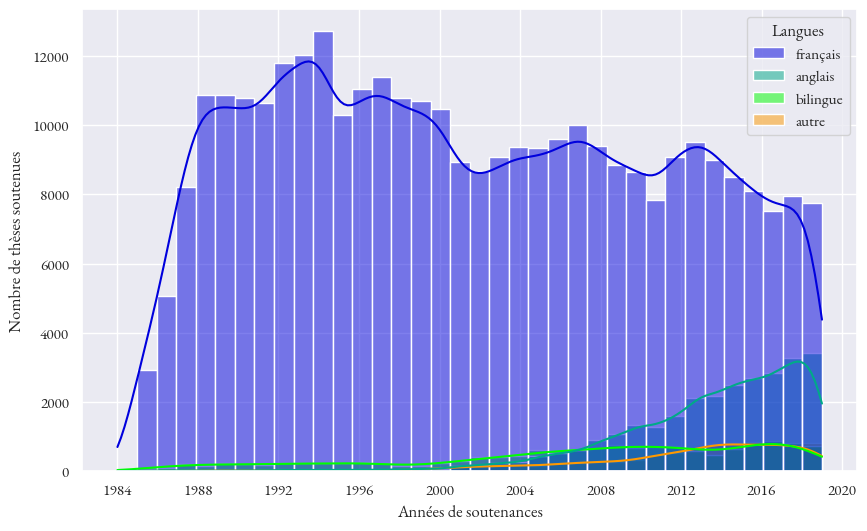

In [264]:
# Création de la figure :
plt.figure(figsize = (10, 6))

# Configuration du style :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# création de l'histogramme : 
histplot = sns.histplot(
    data = phd_1984_2018,
    x = 'Date de soutenance',
    bins = 36,
    hue = 'language_rec',
    hue_order = ['français', 'anglais', 'bilingue', 'autre'],
    palette = 'nipy_spectral',
    kde = True)

# Modification des titres des axes :
histplot.set_xlabel('Années de soutenances')
histplot.set_ylabel('Nombre de thèses soutenues')

# Modification du titre de la légende :
legend = histplot.legend_
legend.set_title('Langues')

# Affichage du graphique :
plt.show()

##### 2. Proportions de soutenances par années et par langues #####

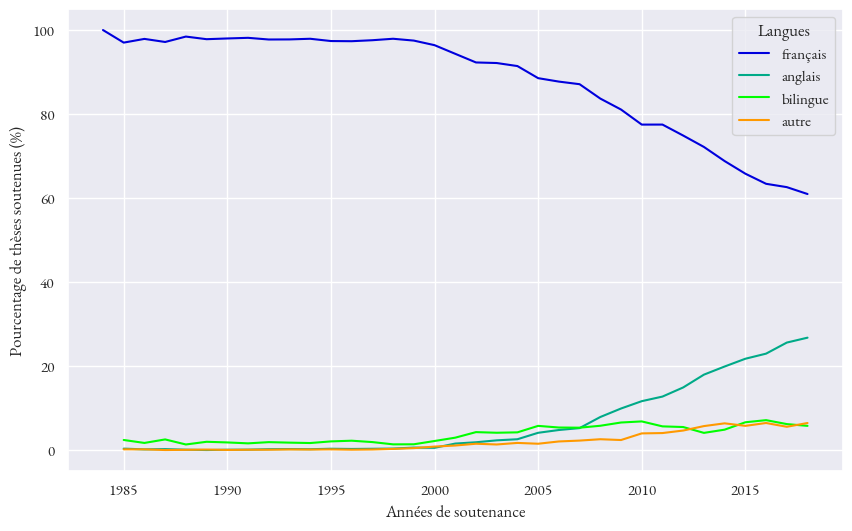

In [297]:
# Calcul des proportions par année et par groupe : 
proportions = phd_1984_2018.groupby(['Année de soutenance', 'language_rec']).size().unstack()
proportions_langues_1984_2018 = proportions.div(proportions.sum(axis=1), axis=0)

# Organisation des colonnes :
langues_ordonnées = ['français', 'anglais', 'bilingue', 'autre']
proportions_langues_1984_2018 = proportions_langues_1984_2018[langues_ordonnées]

# Conversion des proportions en pourcentages :
proportions_pourcentages = proportions_langues_1984_2018 * 100

# Tracé du graphique avec seaborn :
plt.figure(figsize=(10, 6))
sns.lineplot(data=proportions_pourcentages, palette='nipy_spectral', markers=False, dashes=False)

# Paramétrage des titres et de la légende :
plt.xlabel('Années de soutenance')
plt.ylabel('Pourcentage de thèses soutenues (%)')
plt.legend(title = 'Langues')

# Affichage du graphique :
plt.show()